In [1]:
import cv2
import numpy as np

# 이미지 프로세싱 기초 

관심영역(Region Of Interest, ROI)을 지정하면 훨씬 효과적으로 이미지 파악을 할 수 있음



In [17]:
import cv2
import numpy as np

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')

x=320; y=150; w=50; h=50        # roi 좌표
roi = img[y:y+h, x:x+w]         # roi 지정        ---①

print(roi.shape)                # roi shape, (50,50,3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) # roi 전체에 사각형 그리기 ---②
cv2.imshow("img", img)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(50, 50, 3)
27


In [23]:
import cv2
import numpy as np

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')

x=180; y=80; w=50; h=70
roi = img[y:y+h, x:x+w]     # roi 지정
img2 = roi.copy()           # roi 배열 복제 ---①

img[y:y+h, x+w:x+w+w] = roi # 새로운 좌표에 roi 추가, 태양 2개 만들기
cv2.rectangle(img, (x,y), (x+w+w, y+h), (0,255,0)) # 2개의 태양 영역에 사각형 표시

cv2.imshow("img", img)      # 원본 이미지 출력
cv2.imshow("roi", img2)     # roi 만 따로 출력

cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
import cv2
import numpy as np

isDragging = False                      # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1              # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)         # 색상 값 

def onMouse(event,x,y,flags,param):     # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, img      # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:  # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스 움직임 ---③
        if isDragging:                  # 드래그 진행 중
            img_draw = img.copy()       # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:  # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                  # 드래그 중지
            isDragging = False          
            w = x - x0                  # 드래그 영역 폭 계산
            h = y - y0                  # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            if w > 0 and h > 0:         # 폭과 높이가 음수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()   # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림ㅇㅣ 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()


x:180, y:63, w:47, h:43
croped.
x:283, y:98, w:51, h:44
croped.
x:160, y:48, w:36, h:119
croped.
x:165, y:101, w:0, h:0
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:105, y:41, w:45, h:62
croped.
x:244, y:61, w:0, h:0
좌측 상단에서 우측 하단으로 영역을 드래그 하세요.
x:107, y:64, w:60, h:60
croped.
x:288, y:119, w:20, h:19
croped.


In [27]:
import cv2,  numpy as np

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')

x,y,w,h=cv2.selectROI('img', img, False)
if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
    cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('./cropped2.jpg', roi)   # ROI 영역만 파일로 저장

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


ROI로 지정된 영역을 개별 파일로 저장하기 

# BGR , BGRA, Alpha 채널(rgba.py)

In [29]:
import cv2
import numpy as np

# 기본 값 옵션
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')
# IMREAD_COLOR 옵션                   
bgr = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_COLOR)    
# IMREAD_UNCHANGED 옵션
bgra = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_UNCHANGED) 
# 각 옵션에 따른 이미지 shape
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])  # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default (215, 396, 3) color (215, 396, 3) unchanged (215, 396, 4)


In [30]:
import cv2
import numpy as np

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG')

img2 = img.astype(np.uint16)                # dtype 변경 ---①
b,g,r = cv2.split(img2)                     # 채널 별로 분리 ---②
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    # 평균 값 연산후 dtype 변경 ---③

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경 ---④
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

픽셀의 색상이 궁금할때 RGB 포맷의 경우 세가지 채널의 값을 모두 조사해야 하지만, HSV 포맷은 오직 H 채널 값만 확인하면 되므로 색상을 개반으로 하는 
여러가지 작업에 효과적

Hue: 색조
Saturation :채도
Value:명도 

In [31]:
import cv2
import numpy as np

#---① BGR 컬러 스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)  # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # 노랑 값만 갖는 픽셀

#---② BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

#---③ HSV로 변환한 픽셀 출력
print("red:",red_hsv)
print("green:", green_hsv)
print("blue", blue_hsv)
print("yellow", yellow_hsv)


red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue [[[120 255 255]]]
yellow [[[ 30 255 255]]]


# 바이너리 이미지 만들기

127.0


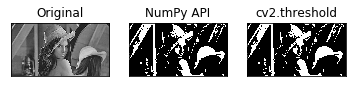

In [34]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ img > 127] = 255      # 127 보다 큰 값만 255로 변경

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

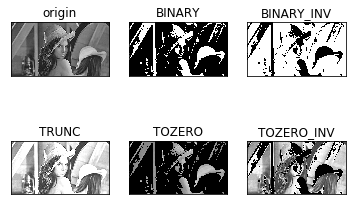

In [35]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, \
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()


바이너리 이미지를 만들때 가장 중요한 작업은 경계 값을 얼마로 정하느냐이다.
적절한 경계값을 정하기 위해서 여러차례에 걸쳐 경계 값을 조금씩 수정해야 한다.
오츠의 알고리즘은 경계 값을 임의로 정해서 픽셀들을 두 부류로 나누고 두 부류의 명암 분포를 반복해서 구한 다음 두 부류의 명암 분포를 가장 균일하게
하는 경계 값을 선택한다.


otsu threshold: 93.0


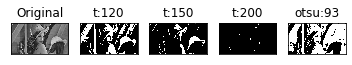

In [43]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
# 경계 값을 130으로 지정  ---①
_, t_120 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)   
_, t_150 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
_, t_200 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

imgs = {'Original': img,'t:120':t_120, 't:150':t_150,  't:200':t_200,'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 5, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

원본 영상에 조명이 일정하지 않거나 배경색이 여러가지인 경우에 아무리 여러번 경계 값을 바꿔가며 시도해도 하나의 경계 값을 
이미지 전체에 적용해서는 좋은 결과를 얻지 못함 이때는
이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만 가지고 계산을 해서 경계 값을 구하는 adaptive thresholds 


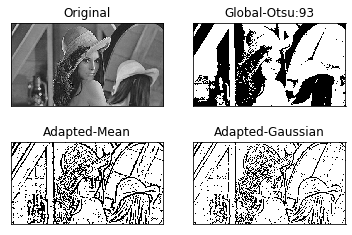

In [45]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()


In [ ]:
https://webnautes.tistory.com/1254

In [9]:
#.threshold 트랙바 

import cv2
import numpy as np

def nothing(x): # 트랙바 콜백 함수 
    #print(x)
    pass

cv2.namedWindow('Binary')
cv2.createTrackbar('threshold','Binary',0,255,nothing)
cv2.setTrackbarPos('threshold','Binary',127)

# 컬러 이미지 가져오기
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG',cv2.IMREAD_COLOR)
cv2.imshow('color',img)
cv2.waitKey(0)

#컬러 이미지 회색 이미지로 변환
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray',img_gray)
cv2.waitKey(0)

while(True):
        low = cv2.getTrackbarPos('threshold','Binary')
        ret,img_binary = cv2.threshold(img_gray, low, 255, cv2.THRESH_BINARY)   #ret 은 binary 이미지에 사용된 경계 값 반환 여기서는 low와 같음 
        # cv2.threshold( 이진화 대상 이미지(그레이스케일 이미지 일것) , 
        #                                threshHold이며 이 값을 기준으로 결과 이미지 픽셀이 검은색 또는 흰색이됨 
        #  cv2.THRESH_BINARY ==   threshHold 보다 입력 이미지  픽셀이 클때 255를 결과 이미지 픽셀로
                                     #                         threshHold 보다 입력 이미지  픽셀이 작다면 0을 결과 이미지 픽셀로
        
        cv2.imshow('Binary',img_binary)
        if cv2.waitKey(1)&0xFF==27:
            break
cv2.destroyAllWindows()

In [23]:
#.threshold 트랙바 

import cv2
import numpy as np

def nothing(x): # 트랙바 콜백 함수 
    #print(x)
    pass

cv2.namedWindow('Binary')
cv2.createTrackbar('threshold','Binary',0,255,nothing)
cv2.setTrackbarPos('threshold','Binary',127)

cv2.namedWindow('Binary_1')
cv2.createTrackbar('threshold','Binary_1',0,255,nothing)
cv2.setTrackbarPos('threshold','Binary_1',127)

# 컬러 이미지 가져오기
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG',cv2.IMREAD_COLOR)
cv2.imshow('color',img)
cv2.waitKey(0)

#컬러 이미지 회색 이미지로 변환
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray',img_gray)
cv2.waitKey(0)

while(True):
        low = cv2.getTrackbarPos('threshold_1','Binary')
        low_1 = cv2.getTrackbarPos('threshold_1','Binary_1')
        ret,img_binary = cv2.threshold(img_gray, low, 255, cv2.THRESH_TRUNC)   
        ret,img_binary_1 = cv2.threshold(img_gray, low_1, 255, cv2.THRESH_BINARY)   
        #ret 은 binary 이미지에 사용된 경계 값 반환 여기서는 low와 같음 
        # cv2.threshold( 이진화 대상 이미지(그레이스케일 이미지 일것) , 
        #                                threshHold이며 이 값을 기준으로 결과 이미지 픽셀이 검은색 또는 흰색이됨 
        #  cv2.THRESH_BINARY ==   threshHold 보다 입력 이미지  픽셀이 클때 255를 결과 이미지 픽셀로
                                     #                         threshHold 보다 입력 이미지  픽셀이 작다면 0을 결과 이미지 픽셀로
        # cv2.THRESH_TRUNC == 픽셀 값이 경계 값을 넘으면 VALUE (255) 지정하고 넘지 못하면 원래의 값 유지 
        #print(low,ret, img_binary)
        cv2.imshow('Binary',img_binary)
        cv2.imshow('Binary_1',img_binary_1)
        if cv2.waitKey(1)&0xFF==27:
            break
cv2.destroyAllWindows()

In [30]:
#.threshold 트랙바 

import cv2
import numpy as np

def nothing(x): # 트랙바 콜백 함수 
    #print(x)
    pass

cv2.namedWindow('Binary')
cv2.createTrackbar('threshold','Binary',0,255,nothing)
cv2.setTrackbarPos('threshold','Binary',127)



# 컬러 이미지 가져오기
img = cv2.imread('C:/Users/SM/Desktop/woman.PNG',cv2.IMREAD_COLOR)
cv2.imshow('color',img)
cv2.waitKey(0)

#컬러 이미지 회색 이미지로 변환
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray',img_gray)
cv2.waitKey(0)

while(True):
        low = cv2.getTrackbarPos('threshold_1','Binary')
        low_1 = cv2.getTrackbarPos('threshold_1','Binary_1')
        ret,img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)   

        #ret 은 binary 이미지에 사용된 경계 값 반환 여기서는 low와 같음 
        # cv2.threshold( 이진화 대상 이미지(그레이스케일 이미지 일것) , 
        #                                threshHold이며 이 값을 기준으로 결과 이미지 픽셀이 검은색 또는 흰색이됨 
        #  cv2.THRESH_BINARY ==   threshHold 보다 입력 이미지  픽셀이 클때 255를 결과 이미지 픽셀로
                                     #                         threshHold 보다 입력 이미지  픽셀이 작다면 0을 결과 이미지 픽셀로
        # cv2.THRESH_TRUNC == 픽셀 값이 경계 값을 넘으면 VALUE (255) 지정하고 넘지 못하면 원래의 값 유지 
        #print(low,ret, img_binary)
        cv2.imshow('Binary',img_binary)
        img_result= cv2.bitwise_and(img,img, mask=img_binary)
        cv2.imshow('result',img_result)
        if cv2.waitKey(1)&0xFF==27:
            break
cv2.destroyAllWindows()